In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import io


In [2]:
!pip install --quiet transformers
!pip install --quiet spacy
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 99.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [3]:
# Load the AI job dataset from the specified path
csv_path = '/content/sample_data/ai_job_dataset.csv'
df = pd.read_csv(csv_path)


In [4]:
# Display the first five rows
df.head()


,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics


In [5]:
# Show info about columns, data types, and missing values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   experience_level        15000 non-null  object 
 5   employment_type         15000 non-null  object 
 6   company_location        15000 non-null  object 
 7   company_size            15000 non-null  object 
 8   employee_residence      15000 non-null  object 
 9   remote_ratio            15000 non-null  int64  
 10  required_skills         15000 non-null  object 
 11  education_required      15000 non-null  object 
 12  years_experience        15000 non-null  int64  
 13  industry                15000 non-null  object 
 14  posting_date            15000 non-null

In [6]:
# Get summary statistics for numerical columns
df.describe(include='all')


,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
count,15000,15000,15000.000000,15000,15000,15000,15000,15000,15000,15000.000000,15000,15000,15000.000000,15000,15000,15000,15000.000000,15000.000000,15000
unique,15000,20,NaN,3,4,4,20,3,20,NaN,13663,4,NaN,15,486,543,NaN,NaN,16
top,AI15000,Machine Learning Researcher,NaN,USD,MI,FT,Germany,S,Sweden,NaN,"Python, TensorFlow, PyTorch",Bachelor,NaN,Retail,2024-07-05,2025-01-05,NaN,NaN,TechCorp Inc
freq,1,808,NaN,11957,3781,3812,814,5007,790,NaN,17,3789,NaN,1063,51,47,NaN,NaN,980
mean,NaN,NaN,115348.965133,NaN,NaN,NaN,NaN,NaN,NaN,49.483333,NaN,NaN,6.253200,NaN,NaN,NaN,1503.314733,7.504273,NaN
std,NaN,NaN,60260.940438,NaN,NaN,NaN,NaN,NaN,NaN,40.812712,NaN,NaN,5.545768,NaN,NaN,NaN,576.127083,1.450870,NaN
min,NaN,NaN,32519.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,500.000000,5.000000,NaN
25%,NaN,NaN,70179.750000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,2.000000,NaN,NaN,NaN,1003.750000,6.200000,NaN
50%,NaN,NaN,99705.000000,NaN,NaN,NaN,NaN,NaN,NaN,50.000000,NaN,NaN,5.000000,NaN,NaN,NaN,1512.000000,7.500000,NaN
75%,NaN,NaN,146408.500000,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,NaN,NaN,10.000000,NaN,NaN,NaN,2000.000000,8.800000,NaN


In [7]:
# Check for duplicate rows
print(f"Duplicate rows: {df.duplicated().sum()}")


Duplicate rows: 0


In [8]:
# Check for missing values in each column
print(df.isnull().sum())


job_id                    0
job_title                 0
salary_usd                0
salary_currency           0
experience_level          0
employment_type           0
company_location          0
company_size              0
employee_residence        0
remote_ratio              0
required_skills           0
education_required        0
years_experience          0
industry                  0
posting_date              0
application_deadline      0
job_description_length    0
benefits_score            0
company_name              0
dtype: int64


In [9]:
print(df.columns.tolist())


['job_id', 'job_title', 'salary_usd', 'salary_currency', 'experience_level', 'employment_type', 'company_location', 'company_size', 'employee_residence', 'remote_ratio', 'required_skills', 'education_required', 'years_experience', 'industry', 'posting_date', 'application_deadline', 'job_description_length', 'benefits_score', 'company_name']


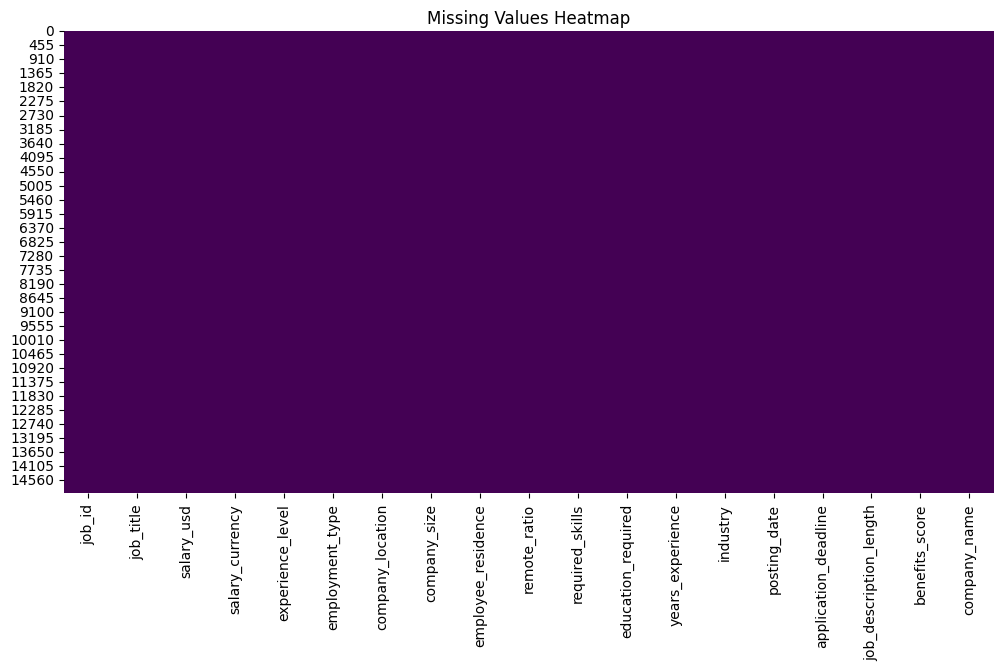

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


In [11]:
df['company_size'] = df['company_size'].str.lower().str.strip()
df['experience_level'] = df['experience_level'].str.title().str.strip()


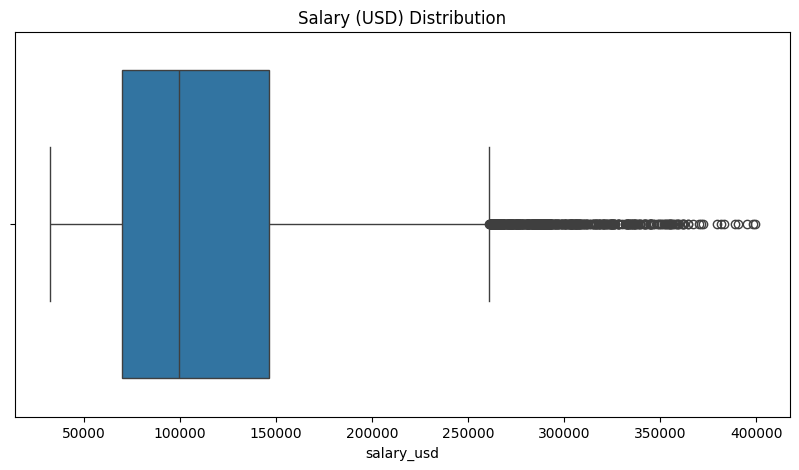

In [12]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['salary_usd'])
plt.title('Salary (USD) Distribution')
plt.show()

# Optionally, remove extreme outliers
q_low = df['salary_usd'].quantile(0.01)
q_high = df['salary_usd'].quantile(0.99)
df = df[(df['salary_usd'] >= q_low) & (df['salary_usd'] <= q_high)]


In [13]:
df.to_csv('/content/sample_data/ai_job_dataset_cleaned.csv', index=False)


In [14]:
print(df.columns.tolist())


['job_id', 'job_title', 'salary_usd', 'salary_currency', 'experience_level', 'employment_type', 'company_location', 'company_size', 'employee_residence', 'remote_ratio', 'required_skills', 'education_required', 'years_experience', 'industry', 'posting_date', 'application_deadline', 'job_description_length', 'benefits_score', 'company_name']


In [15]:
cols_to_encode = ['experience_level', 'employment_type', 'company_size', 'industry', 'education_required']
df = pd.get_dummies(df, columns=cols_to_encode, drop_first=True)


In [16]:
df['is_remote'] = (df['remote_ratio'] == 100).astype(int)
df['is_hybrid'] = (df['remote_ratio'] == 50).astype(int)
df['is_onsite'] = (df['remote_ratio'] == 0).astype(int)


In [17]:
df['salary_usd_norm'] = (df['salary_usd'] - df['salary_usd'].min()) / (df['salary_usd'].max() - df['salary_usd'].min())

if 'years_experience' in df.columns:
    df['years_experience_norm'] = (df['years_experience'] - df['years_experience'].min()) / (df['years_experience'].max() - df['years_experience'].min())


In [18]:
import re

def extract_skills(text):
    if pd.isnull(text):
        return []
    return [skill.strip().lower() for skill in re.split(',|;', text)]

df['skills_list'] = df['required_skills'].apply(extract_skills)

from collections import Counter
skill_counter = Counter([skill for skills in df['skills_list'] for skill in skills if skill])
top_skills = [skill for skill, count in skill_counter.most_common(20)]

for skill in top_skills:
    df[f'skill_{skill}'] = df['skills_list'].apply(lambda skills: int(skill in skills))


In [19]:
feature_cols = [col for col in df.columns if col.startswith('experience_level_') or
                col.startswith('employment_type_') or
                col.startswith('company_size_') or
                col.startswith('industry_') or
                col.startswith('education_required_') or
                col.startswith('skill_') or
                col in ['salary_usd_norm', 'years_experience_norm', 'is_remote', 'is_hybrid', 'is_onsite']]

df_features = df[feature_cols]


In [20]:
print(top_skills)


['python', 'sql', 'tensorflow', 'kubernetes', 'scala', 'pytorch', 'linux', 'git', 'java', 'gcp', 'hadoop', 'tableau', 'r', 'computer vision', 'data visualization', 'deep learning', 'mlops', 'spark', 'azure', 'nlp']


In [21]:
for skill in top_skills:
    safe_skill = skill.replace(' ', '_')  # Replace spaces for column names
    df[f'skill_{safe_skill}'] = df['skills_list'].apply(lambda skills: int(skill in skills))


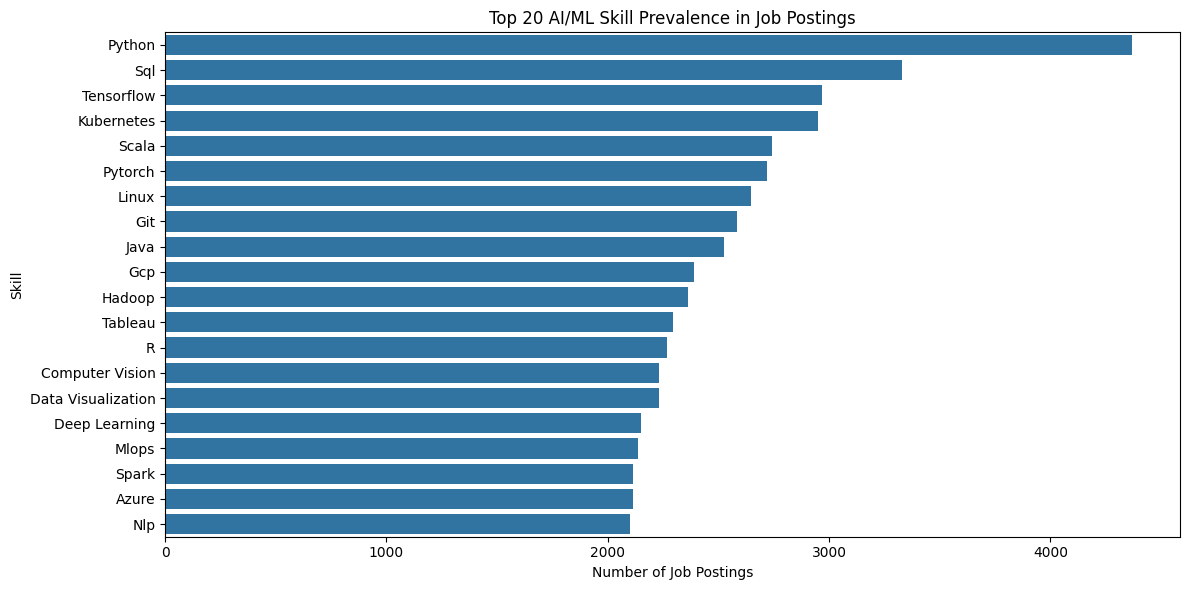

In [22]:
import matplotlib.pyplot as plt

skill_counts = [df[f'skill_{skill.replace(" ", "_")}'].sum() for skill in top_skills]

plt.figure(figsize=(12,6))
sns.barplot(x=skill_counts, y=[s.replace('_', ' ').title() for s in [skill.replace(' ', '_') for skill in top_skills]])
plt.xlabel('Number of Job Postings')
plt.ylabel('Skill')
plt.title('Top 20 AI/ML Skill Prevalence in Job Postings')
plt.tight_layout()
plt.show()


In [23]:
# Define features and target
X = df_features.drop(columns=['salary_usd_norm'], errors='ignore')  # Features
y = df['salary_usd_norm']  # Target normalized salary


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)


In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize models
lr = LinearRegression()
rf = RandomForestRegressor(random_state=42, n_estimators=100)
xgbr = xgb.XGBRegressor(random_state=42, n_estimators=100, objective='reg:squarederror')

# Train models
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgbr.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [27]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model(model, X_test, y_test):
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))  # <-- Fix here
    r2 = r2_score(y_test, preds)
    return mae, rmse, r2

models = {'Linear Regression': lr, 'Random Forest': rf, 'XGBoost': xgbr}

for name, model in models.items():
    mae, rmse, r2 = evaluate_model(model, X_test, y_test)
    print(f"{name} - MAE: {mae:.4f}, RMSE: {rmse:.4f}, R2: {r2:.4f}")


Linear Regression - MAE: 0.0933, RMSE: 0.1205, R2: 0.6467
Random Forest - MAE: 0.0947, RMSE: 0.1242, R2: 0.6248
XGBoost - MAE: 0.0993, RMSE: 0.1303, R2: 0.5872


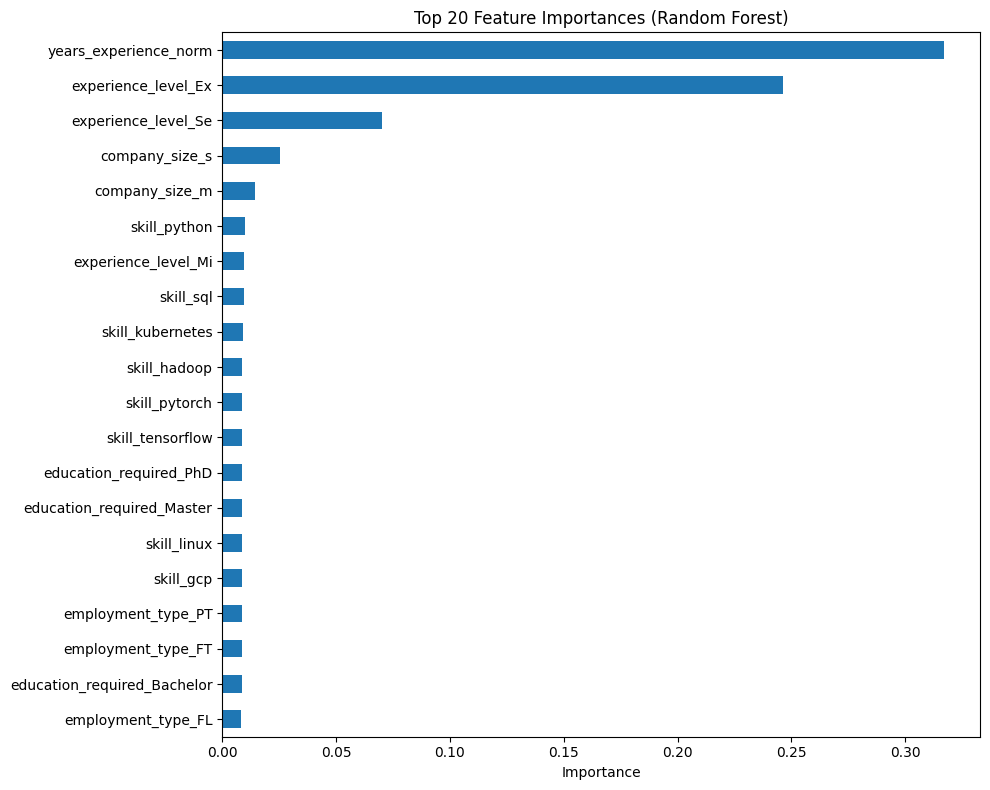

In [28]:
importances = rf.feature_importances_
feature_names = X.columns

feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=True).tail(20)

plt.figure(figsize=(10,8))
feat_imp.plot(kind='barh')
plt.title('Top 20 Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()


In [29]:
# Convert posting_date to datetime
df['posting_date'] = pd.to_datetime(df['posting_date'], errors='coerce')

# Extract year-month for trend analysis
df['year_month'] = df['posting_date'].dt.to_period('M')


In [30]:
# Explode skills_list to have one skill per row
df_exploded = df.explode('skills_list')

# Filter to top skills only
df_exploded = df_exploded[df_exploded['skills_list'].isin(top_skills)]

# Group by country, month, and skill; count occurrences
skill_trends = df_exploded.groupby(['company_location', 'year_month', 'skills_list']).size().reset_index(name='count')


In [32]:
print(data_pivot.dtypes)


Series([], dtype: object)


In [33]:
print(skill_trends['company_location'].unique())
print(skill_trends['skills_list'].unique())
print(skill_trends.head())


['Australia' 'Austria' 'Canada' 'China' 'Denmark' 'Finland' 'France'
 'Germany' 'India' 'Ireland' 'Israel' 'Japan' 'Netherlands' 'Norway'
 'Singapore' 'South Korea' 'Sweden' 'Switzerland' 'United Kingdom'
 'United States']
['azure' 'computer vision' 'data visualization' 'deep learning' 'gcp'
 'git' 'hadoop' 'java' 'kubernetes' 'linux' 'mlops' 'nlp' 'python'
 'pytorch' 'r' 'scala' 'spark' 'sql' 'tableau' 'tensorflow']
  company_location year_month         skills_list  count
0        Australia    2024-01               azure      3
1        Australia    2024-01     computer vision      7
2        Australia    2024-01  data visualization      6
3        Australia    2024-01       deep learning      7
4        Australia    2024-01                 gcp      3


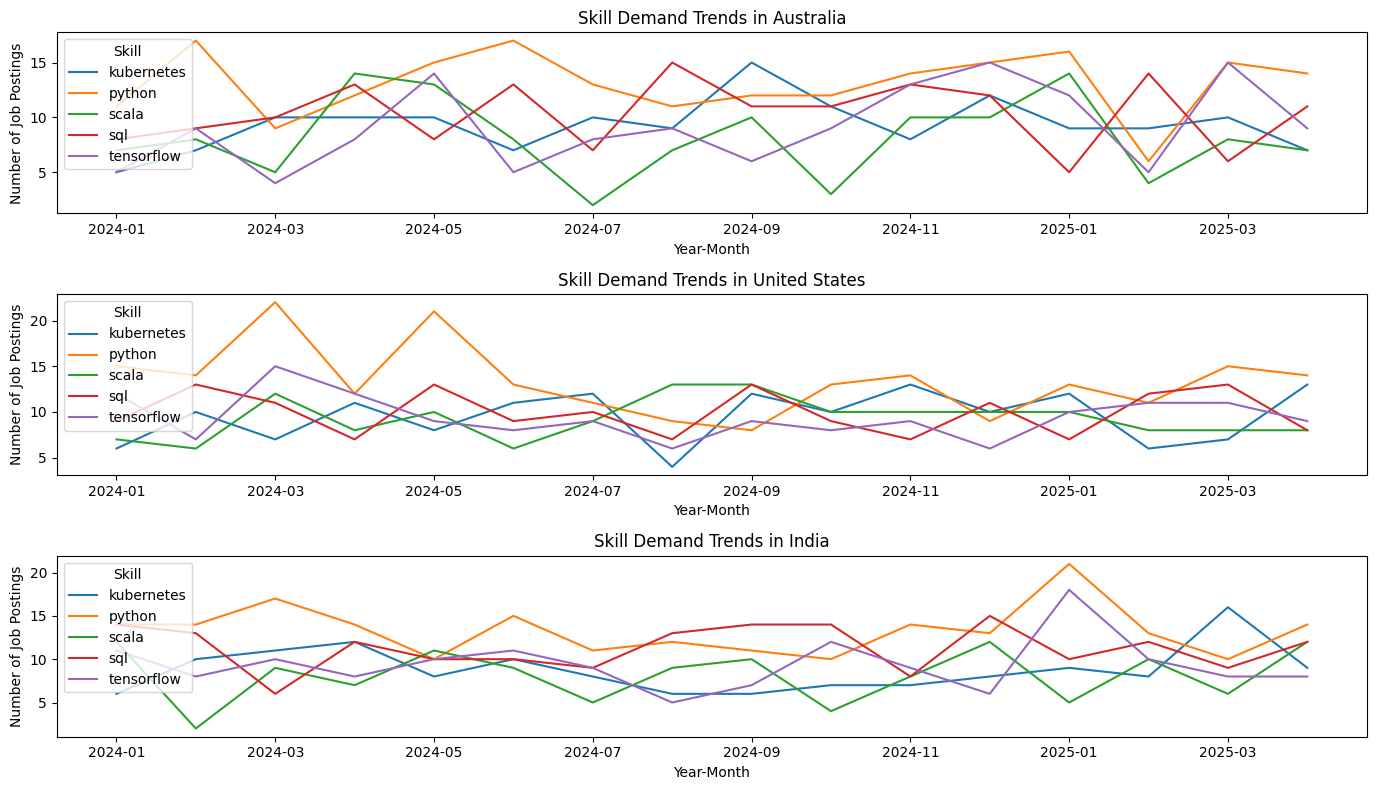

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- 1. Set up country and skill filters based on data ---
countries = ['Australia','United States', 'India']  # Use exact names from  data
skills_to_plot = ['python', 'sql', 'tensorflow', 'kubernetes', 'scala']  # Choose any subset of top skills

# --- 2. Ensure year_month is a string (for plotting) ---
df['posting_date'] = pd.to_datetime(df['posting_date'], errors='coerce')
df['year_month'] = df['posting_date'].dt.to_period('M').astype(str)

# --- 3. Explode skills_list for analysis ---
df_exploded = df.explode('skills_list')

# --- 4. Filter to only top skills (optional, but keeps plot clean) ---
df_exploded = df_exploded[df_exploded['skills_list'].isin(skills_to_plot)]

# --- 5. Group by country, month, and skill ---
skill_trends = df_exploded.groupby(['company_location', 'year_month', 'skills_list']).size().reset_index(name='count')

# --- 6. Plot skill trends for each country ---
plt.figure(figsize=(14, 8))

for i, country in enumerate(countries, 1):
    plt.subplot(len(countries), 1, i)
    data = skill_trends[
        (skill_trends['company_location'] == country) &
        (skill_trends['skills_list'].isin(skills_to_plot))
    ]
    if data.empty:
        print(f"No data for {country} with selected skills.")
        continue
    # Pivot for plotting
    data_pivot = data.pivot(index='year_month', columns='skills_list', values='count').fillna(0)
    # Ensure numeric
    data_pivot = data_pivot.apply(pd.to_numeric, errors='coerce')
    # Plot
    data_pivot.plot(ax=plt.gca())
    plt.title(f'Skill Demand Trends in {country}')
    plt.xlabel('Year-Month')
    plt.ylabel('Number of Job Postings')
    plt.legend(title='Skill')
    plt.tight_layout()

plt.show()


In [39]:
print(df.columns.tolist())


['job_id', 'job_title', 'salary_usd', 'salary_currency', 'company_location', 'employee_residence', 'remote_ratio', 'required_skills', 'years_experience', 'posting_date', 'application_deadline', 'job_description_length', 'benefits_score', 'company_name', 'experience_level_Ex', 'experience_level_Mi', 'experience_level_Se', 'employment_type_FL', 'employment_type_FT', 'employment_type_PT', 'company_size_m', 'company_size_s', 'industry_Consulting', 'industry_Education', 'industry_Energy', 'industry_Finance', 'industry_Gaming', 'industry_Government', 'industry_Healthcare', 'industry_Manufacturing', 'industry_Media', 'industry_Real Estate', 'industry_Retail', 'industry_Technology', 'industry_Telecommunications', 'industry_Transportation', 'education_required_Bachelor', 'education_required_Master', 'education_required_PhD', 'is_remote', 'is_hybrid', 'is_onsite', 'salary_usd_norm', 'years_experience_norm', 'skills_list', 'skill_python', 'skill_sql', 'skill_tensorflow', 'skill_kubernetes', 'skil

Average benefits score by company size:
company_size_m  company_size_s
False           False             7.519816
                True              7.496335
True            False             7.490632
Name: benefits_score, dtype: float64


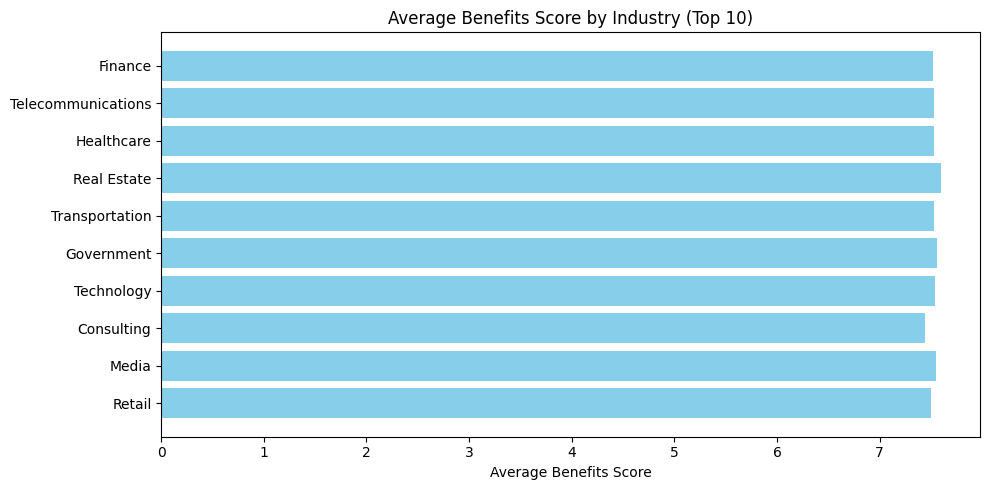

In [40]:
import matplotlib.pyplot as plt

# By company size
benefits_by_size = df.groupby(['company_size_m', 'company_size_s']).benefits_score.mean()
print("Average benefits score by company size:")
print(benefits_by_size)

# By industry (top 10 industries by count)
industry_cols = [col for col in df.columns if col.startswith('industry_')]
industry_counts = df[industry_cols].sum().sort_values(ascending=False)
top_industries = industry_counts.head(10).index

benefits_by_industry = {}
for col in top_industries:
    benefits_by_industry[col.replace('industry_', '')] = df[df[col] == 1]['benefits_score'].mean()

# Plot
plt.figure(figsize=(10, 5))
plt.barh(list(benefits_by_industry.keys()), list(benefits_by_industry.values()), color='skyblue')
plt.xlabel('Average Benefits Score')
plt.title('Average Benefits Score by Industry (Top 10)')
plt.tight_layout()
plt.show()


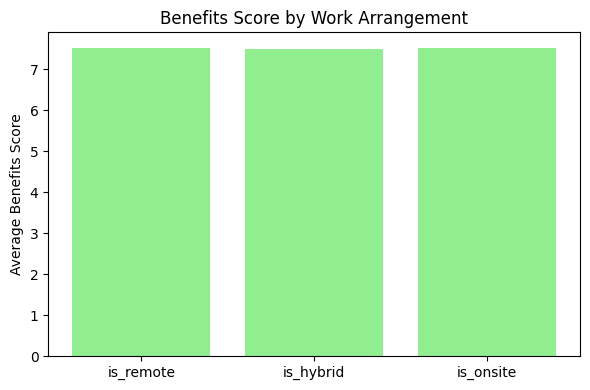

In [41]:
remote_types = ['is_remote', 'is_hybrid', 'is_onsite']
benefits_by_remote = {}

for remote in remote_types:
    benefits_by_remote[remote] = df[df[remote] == 1]['benefits_score'].mean()

plt.figure(figsize=(6, 4))
plt.bar(benefits_by_remote.keys(), benefits_by_remote.values(), color='lightgreen')
plt.ylabel('Average Benefits Score')
plt.title('Benefits Score by Work Arrangement')
plt.tight_layout()
plt.show()


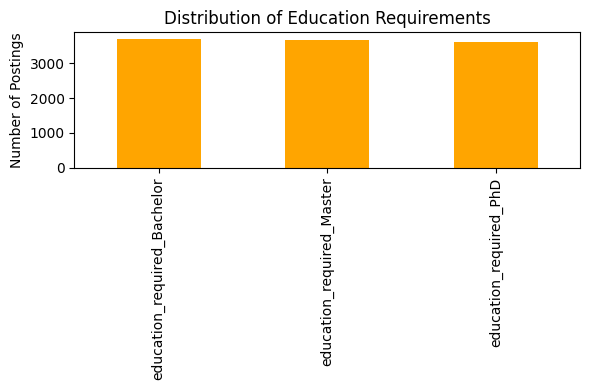

In [42]:
edu_cols = [col for col in df.columns if col.startswith('education_required_')]
edu_counts = df[edu_cols].sum().sort_values(ascending=False)

plt.figure(figsize=(6, 4))
edu_counts.plot(kind='bar', color='orange')
plt.ylabel('Number of Postings')
plt.title('Distribution of Education Requirements')
plt.tight_layout()
plt.show()
